In [1]:
import numpy as np

from euler import Euler

In [2]:
def sod(g, v, gamma, U):
    
    # setup initial conditions -- this is Sod's problem
    rho_l = 1.0
    u_l = 0.0
    p_l = 1.0
    rho_r = 0.125
    u_r = 0.0
    p_r = 0.1

    idx_l = g.x < 0.5
    idx_r = g.x >= 0.5

    U[idx_l, v.urho] = rho_l
    U[idx_l, v.umx] =  rho_l * u_l
    U[idx_l, v.uener] = p_l/(gamma - 1.0) + 0.5 * rho_l * u_l**2

    U[idx_r, v.urho] = rho_r
    U[idx_r, v.umx] =  rho_r * u_r
    U[idx_r, v.uener] = p_r/(gamma - 1.0) + 0.5 * rho_r * u_r**2

In [3]:
e = Euler(64, 0.5, init_cond=sod)
e.estimate_dt()
e.dt

0.006602767615066536

In [4]:
q_left, q_right = e.interface_states()
flux = e.compute_fluxes(q_left, q_right)
flux[:, 0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.39539107, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [5]:
#e.advance_step()
#e.U

In [6]:
e.evolve(0.2, verbose=False)

In [7]:
import matplotlib.pyplot as plt

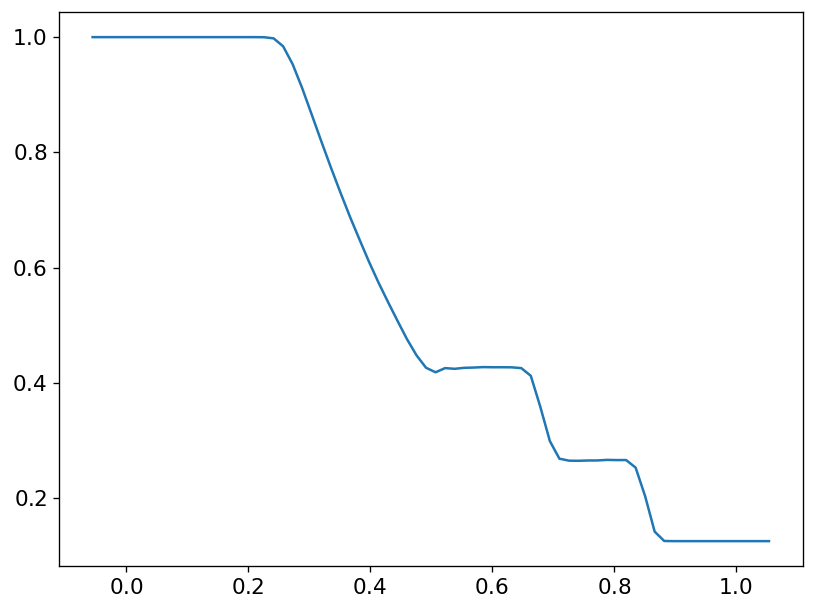

In [8]:
fig, ax = plt.subplots()
ax.plot(e.grid.x, e.U[:, 0])

In [9]:
dens_back = e.U[:, 0].copy()

In [10]:
e2 = Euler(64, 0.5, init_cond=sod, use_flattening=False)
e2.evolve(0.2, verbose=False)


In [11]:
e2.U[:, 0] - e.U[:, 0]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.11022302e-16,  8.88178420e-16,  1.38777878e-14,  2.38697950e-13,
        3.72990527e-12,  5.54356561e-11,  7.88758059e-10,  1.08328925e-08,
        1.45024754e-07,  1.89404130e-06,  2.48980063e-05,  3.36626737e-04,
        1.42326691e-03,  2.02914397e-03,  1.96902467e-03,  1.51726819e-03,
        9.08562025e-04,  3.20891929e-04, -2.45590848e-04, -6.06724100e-04,
       -1.18778647e-03, -1.21666991e-03, -1.43693223e-03, -1.77309877e-03,
       -1.68656956e-03, -9.55755111e-04, -1.14694883e-03, -1.42862032e-03,
       -5.32042498e-04,  1.61607253e-03,  1.34577148e-03,  2.32266028e-04,
        4.11360553e-04, -2.61223511e-04,  9.23788763e-05,  6.22656191e-05,
        1.60218207e-04,  6.65395713e-04,  4.08741506e-03,  1.01627344e-02,
        5.38794767e-03, -1.43007382e-03, -3.80694752e-03, -3.30895718e-03,
       -3.25149460e-03, -

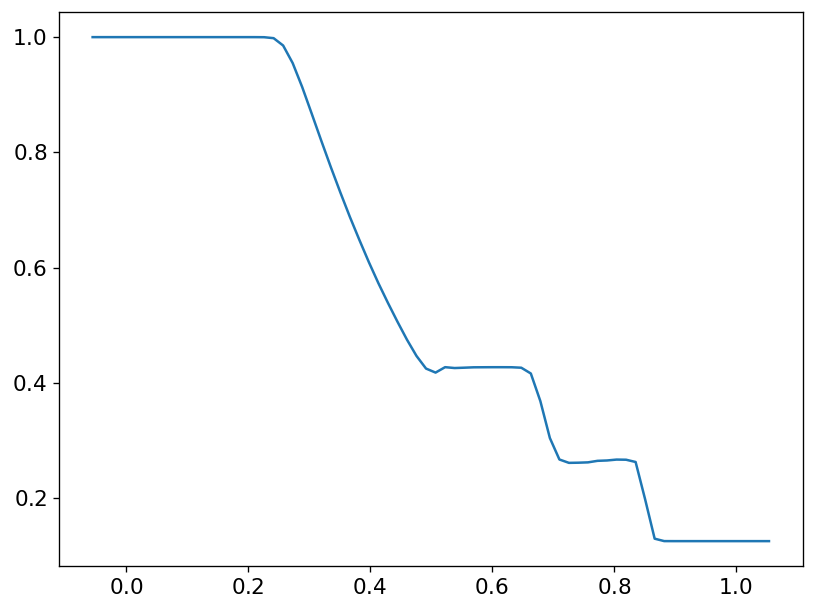

In [12]:
fig, ax = plt.subplots()
ax.plot(e2.grid.x, e2.U[:, 0])